# Convolution Neural Network Homework

This is the 3rd assignment for CAP 4630 and we will go through some primary operations for image processsing and implement one of the earilest but representative convolution neural networks - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras for first section; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5

## 1 - Basic Image Processing ##
### 1.1 Data Preparation 

Import useful packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. Show the image in the output box before image-array conversion.
4. Print out the size of the array
5. Print out the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

In [ ]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image, display

# Display original image
display(Image(filename='./image.jpg'))

# Convert image to array, print out the shape of array, and print out the entire array
im = imageio.imread('./image.jpg')

# Print out the shape of the array
print('Shape of the array is : {}'.format(im.shape))

# Print out the numeric matrix of the image
print('Printing out the numeric matrix of the image: ')
print(im)

Shape of the array is : (30, 30)
Printing out the numeric matrix of the image: 
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. Print out convolution result for first ten rows.
4. Print out the shape of the convolution result.
5. Display convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:
![image.png](attachment:image.png)
2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid, locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e. our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![image.png](attachment:image.png)

Convolution result for the first ten rows:
[[ 134.   37.   98.  195.  173. -221.    5.  137.    3.  -62.  -87.  -39.
   -92. -128. -175. -152.  -77.   -8.  -50.   13.   25.    1.  -58.  -22.
    -7.   64.  -12.  -24.]
 [ -75.  -80.   56.  -65.  182.  -39.   12.  -96.  -83.  -99.  -27.  -24.
   -48.  -70.  -12.  -45.  -75.  -88.  -92.  -29.  -88.   -2.  -15.   33.
   -25.   18.   14.    2.]
 [  96.  -37. -163.   22.   68. -199.  -10.  -89.   37.   29.   49.  -25.
    18.  -17.   43.   29.  -30.  -51.  180.  129.   16.  -26.  -43.   38.
    28.   49.   11.  -19.]
 [-101.  121.   81.  148.  -71.  -30. -100.   47.   82.  -13.  -15.  -44.
    21.  -23.   16.   74.    5. -154.  130.  -84.   47.  -76.  -75.  -52.
    77.  114.   -7.  -49.]
 [   7.  127. -141.  159. -127.  -74.  142.  -61.   -6.  -63.  -23.    2.
   -32.  -67.   31.  -23.   57.  -50.  205. -110.  264.  -20. -135.  -52.
   -32.   -8.   61.   44.]
 [  72.  137.  -99. -175.  -89.   29.  -39.  -17.   22.    5.  -19.   51.
   -65. 

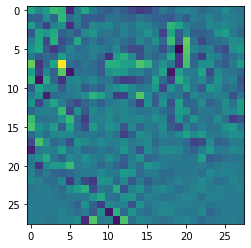

In [ ]:
######## Convolution with Laplacian Filter ##################
laplaceKernel = np.array(([0,1,0],[1,-4,1],[0,1,0]))

def convolve(image, kernel):
  # This will be the height and width of our output array
  imageHeight = (int)((image.shape[0] - kernel.shape[0]) / 1 + 1)
  imageWidth = (int)((image.shape[1] - kernel.shape[1]) / 1 + 1)

  # This will be the output array of the convolution
  output = np.zeros((imageHeight, imageWidth))

  # Here, perform the convolution. We sum the element-wise product results
  # and store those values in the corresponding location in the output array
  for x in range(imageHeight):
    for y in range(imageWidth):
      output[x,y] = np.sum(np.multiply(kernel, image[x:x+kernel.shape[0], y:y+kernel.shape[1]]))

  # Return the new array
  return output

# Catch the resulting array from convolution
result = np.array(convolve(im, laplaceKernel))

# Print out the convolution result for the first ten rows
print('Convolution result for the first ten rows:')
print(result[0:10])

# Print out the shape of the convolution result
print('\nShape of the convolution result is: {}'.format(np.shape(result)))

# Display image from convolution
print('\nDisplaying image from convolution: ')
plt.imshow(result)

### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. Print out convolution result for first ten rows.
3. Print out the shape of the convolution result.
4. Display convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]
 
![image.png](attachment:image.png) 

Printing out the convolution result for the first ten rows:
[[ 134.   98.  173.    5.    3.  -87.  -92. -175.  -77.  -50.   25.  -58.
    -7.  -12.]
 [  96. -163.   68.  -10.   37.   49.   18.   43.  -30.  180.   16.  -43.
    28.   11.]
 [   7. -141. -127.  142.   -6.  -23.  -32.   31.   57.  205.  264. -135.
   -32.   61.]
 [  -1.  -46.  109.  -13.   11. -195.  159. -120.  -63.  143.  229. -165.
     8.  -27.]
 [ 106.   49.  241.  -26.  -33.   69.   84.   24.   13. -258.   -3.  125.
    40.  -22.]
 [ -79.   41.  -89.   18.  -31.   26.  103.  -10.   81.   77.  106.  -88.
    51.  -19.]
 [  76.   24.   15. -144.  -18.   -6.   36. -164.  -80. -120.  -65.   45.
   -33.  -32.]
 [ 196.  -18.   71.  -43.   20.   50.   42.   50.   59. -111.  -45.  -15.
    58. -169.]
 [ -38.  -43.   48.   -9.   -5.   26. -164.   61.  -16.   -5.  126.   96.
    -8.   71.]
 [-234.   26.  110.   29.  -39.  -31.   86. -111.  -10.   60.  -27.   15.
     1.   44.]]

The shape of the convolution result is: (14, 14)

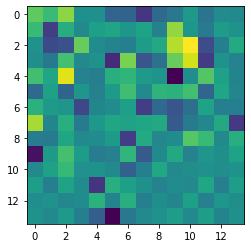

In [ ]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################
# This is the convolution process with stride = 2
def convolve2(image, kernel):
  # This will be the height and width of our output array
  dimHeight = (int)((image.shape[0] - kernel.shape[0]) / 2 + 1)
  dimWidth = (int)((image.shape[1] - kernel.shape[1]) / 2 + 1)

  # The offset when we are performing our calculations in the convolution
  offset = kernel.shape[0]
  # This will be our output array
  output = np.zeros((dimHeight, dimWidth))
  i = 0
  j = 0

  # Here, perform the convolution
  for x, i in zip(range(0, image.shape[0] - offset + 1, 2), range(dimHeight)):
    for y, j in zip(range(0, image.shape[1] - offset + 1, 2), range(dimWidth)):
      output[i,j] = np.sum(np.multiply(kernel, image[x:x+offset, y:y+offset]))

  return output

newResult = np.array(convolve2(im, laplaceKernel))

# Print out the convolution result for the first ten rows
print('Printing out the convolution result for the first ten rows:')
print(newResult[0:10])

#Print out the shape of the convolution result
print('\nThe shape of the convolution result is: {}'.format(newResult.shape))

# Display convolution result as image
print('\nConvolution result as image:')
plt.imshow(newResult)

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(10 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. Print out convolution result for first ten rows.
4. Print out the shape of the convolution result.
5. Display convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]
 ![image.png](attachment:image.png)

Printing result for the first ten rows
[[ 98. 112.  93. 195. 173. 209. 206. 237. 223. 185. 167. 169. 136.  54.
   55.]
 [ 84. 127. 137. 253. 254. 249. 241. 250. 236. 224. 181. 173. 124.  55.
   59.]
 [ 85. 145. 225. 255. 242. 247. 236. 232. 192. 208. 146. 199. 178. 103.
   65.]
 [104. 178. 216. 230. 242. 238. 176. 218. 186. 198. 203. 165. 179. 168.
   78.]
 [ 95. 186. 147. 248. 242. 221.  62.  74.  95. 182. 155.  91. 145. 161.
  116.]
 [201. 201. 229. 217. 210. 188. 169. 164. 111. 154.  81. 104. 104. 141.
  158.]
 [184. 212. 180. 214. 193. 148. 191. 141. 127. 140. 114. 113. 115. 139.
  102.]
 [172. 105.  61. 149. 189. 119. 106. 120. 109. 148.  95. 110. 102. 110.
   94.]
 [186.  41.  34. 104. 153.  91. 172. 147.  98. 143. 136.  92.  83.  37.
   87.]
 [207.  94.  42.  75.  95.  99. 104. 120. 101.  94. 116. 149.  83.  64.
   42.]]

The shape of the result is: (15, 15)

Displaying the result as an image: 


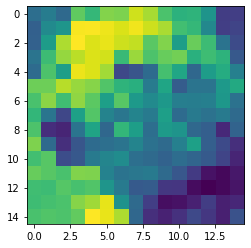

In [ ]:
######## MaxPooling with the setting of 2X2 ##################
def maxPooling(image, poolingMask):
  # This will be the size of our max pooling
  dimHeight = (int)((image.shape[0] - poolingMask[0]) / 2 + 1)
  dimWidth = (int)((image.shape[1] - poolingMask[1]) / 2 + 1)
  
  # The output of array of our maxPooling
  output = np.zeros((dimHeight, dimWidth))

  for x, i in zip(range(0, image.shape[0], 2), range(dimHeight)):
    for y, j in zip(range(0, image.shape[1], 2), range(dimWidth)):
      output[i, j] = np.amax(image[x:x+poolingMask[0], y:y+poolingMask[1]])

  return output

# This is the pooling mask, which is a 2X2 pooling mask
mask = np.array([2,2])

# This will contain the result of our max pooling
maxPoolResult = maxPooling(im, mask)

# Print out the result for the first ten rows
print('Printing result for the first ten rows')
print(maxPoolResult[0:10])

# Print the shape of the result
print('\nThe shape of the result is: {}'.format(maxPoolResult.shape))

# Print the result as image
print('\nDisplaying the result as an image: ')
plt.imshow(maxPoolResult)

## 2 - Convolution Neural Network ##
 
In this section, we will use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark.

### 2.1 Library Preparation

Import useful deep learning packages. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import keras from tensorflow.
3. Import layers from tensorflow.keras


In [ ]:
# Import useful deep learning packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.losses import categorical_crossentropy

### 2.2 Training Data Preparation

Import useful packages and prepare Fashion MNIST data. **(15 Points)**

**Tasks:**
1. Download Fashion MNIST data and split it with keras and prepare training/test data sets.
2. Preprocess training/test data with normalization, dimension extension, and padding (for LeNet-5 configuration).
3. Preprocess label data to binary class matrices.
4. Print out first image in training set and its correponding label index
5. Print out the shape of total training data, the number of training samples, and the number of test samples.

**Hints**
1. You may consider load function from the reference link. https://keras.io/api/datasets/ It provides dataloader function which can tackle downloading and data splitting automatically.
2. For label preprocessing, you may consider **keras.utils.to_categorical** to convert class vectors to binary class matrices. This conversion makes sure the label can match the format of prediction output from neural network.
3. For image display, consider showing the image and label **before dimension extension and label preprocessing**.
4. You may consider MNIST processing shown in class as an example.

**References**
- Fashion MNIST https://github.com/zalandoresearch/fashion-mnist


Shape of x_train is: (60000, 32, 32, 1)
Shape of x_test is: (10000, 32, 32, 1)
Shape of y_train is: (60000,)
Shape of y_test is: (10000,)

The total number of training samples is: 60000
The total number of testing samples is: 10000


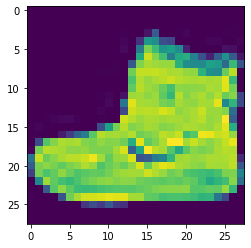

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Model / data parameters
num_classes = 10
input_shape = (32,32,1)

# Image Normalization (Scaling to [0, 1])
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Print out first image and its correponding label index
singleImage = x_train[0]
plt.imshow(singleImage)

# Dimension extension to ensure that images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Conduct padding on training/test images to (32, 32, 1) for LeNet-5
x_train = tf.image.pad_to_bounding_box(x_train, 4, 4, 32, 32)
x_test = tf.image.pad_to_bounding_box(x_test, 4, 4, 32, 32)

# Print out the training/test data shapes and the numbers of training/test samples
print('Shape of x_train is: {}'.format(x_train.shape))
print('Shape of x_test is: {}'.format(x_test.shape))
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_test is: {}'.format(y_test.shape))
print()
print('The total number of training samples is: {}'.format(x_train.shape[0]))
print('The total number of testing samples is: {}'.format(x_test.shape[0]))

# convert label vectors to binary class matrices for training/test labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 2.2 LeNet-5 

Construct LeNet-5 as learning model for Fashion MNIST classification task. **(15 Points)**

**Tasks:**
1. Build up LeNet-5 with keras.Sequential
2. Print out the **model summary**.

**Hints:**
1. You may consider the convolution neural network shown in class as an example.
2. The structure of LeNet-5 is listed below. Try to map each step to related processing operation. You can also search some materials to faciliate implementation. 
3. Kindly note that we modify some original settings here. \
    First, we change tanh activation to "relu" activation here. Please use "**activation="relu"**" for implementation.\
    Next, we use MaxPooling instead of original AveragePooling. Please use "**MaxPooling2D(pool_size=(2, 2))**" for implementation.
![image.png](attachment:image.png)

**References:**
- http://yann.lecun.com/exdb/lenet/


In [ ]:
### Construct LeNet-5 and Print out Model Summary
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(num_classes, kernel_regularizer=regularizers.l2(4e-5), activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_31 (Dense)             (None, 84)              

### 2.3 LeNet-5 Model Training

Train LeNet-5 model with specific training strategy. **(15 Points)**

**Tasks:**
1. Set batch size to **64** for training. 
2. Pick **SGD optimizer** with learning rate of **0.1**, regularizer lambda of **4e-5**, momentum of **0.9**, and **nesterov=True**, for model training.
3. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
4. Set validation_split to **0.1** which means it excludes 1/10 training data for validation process.
4. Train the model with **10 epochs**.
5. Evaluate model with test data set and print out **test loss** and **test accuracy**.

**Hints:**
1. You may consider the examples from Keras to specify optimizer parameters. https://keras.io/api/optimizers/
2. You may use the example shown in class to faciliate this implementation.
3. You may see slightly different results every time you run the training. It is normal since there is randomness for training. However, you should expect the validation accuracy is above **87%**.

In [ ]:
### Train with SGD optimizer with learning rate =0.1, regularizer=4e-5, momentum=0.9, and nesterov=True
# The batch size of epochs for our model training
batch_size = 64
epochs = 10

# Here, I instantiate the optimizer with the specified parameters. Then it will
# get passed to 'model.compile()' as the optimizer
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True, name='SGD')

model.compile(loss=categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

# Now, train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 3s 4ms/step - loss: 0.6133 - accuracy: 0.7851 - val_loss: 0.5149 - val_accuracy: 0.8270
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4462 - accuracy: 0.8482 - val_loss: 0.4624 - val_accuracy: 0.8402
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4290 - accuracy: 0.8556 - val_loss: 0.4375 - val_accuracy: 0.8535
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4096 - accuracy: 0.8630 - val_loss: 0.4068 - val_accuracy: 0.8603
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.4083 - accuracy: 0.8639 - val_loss: 0.4099 - val_accuracy: 0.8575
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3899 - accuracy: 0.8711 - val_loss: 0.3970 - val_accuracy: 0.8707
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.3906 - accuracy: 0.8722 - val_loss: 0.4138 - val_accuracy: 0.8647
Epoch 

In [ ]:
### Print out the evaluation results, including test loss and test accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss is: {}'.format(score[0]))
print('Test accuracy is: {}'.format(score[1]))

Test loss is: 0.4318810999393463
Test accuracy is: 0.8684999942779541


### 2.4 Different Training Schemes

Train LeNet-5 model with different strategies. **(15 Points)**\
You may put reported numbers and plots in one figure or screenshot. \
Please insert the resulting graphs or screenshots in below box in **Markdown** Mode.

**Tasks:**
1. Try to set batch size to **128** and see if there is a difference. \
    Report **final test loss and test accuracy** and **intermediate training/validation loss plots over epochs**. 
2. Try to set optimizer to **Adam** (optimizer="adam") and see if there is a difference. \
    Report **final test loss and test accuracy** and **intermediate training/validation loss plots over epochs**. 
3. Try to change learning rate to **0.05** and see if there is a difference. \
    Report **final test loss and test accuracy** and **intermediate training/validation loss plots over epochs**. 

**Hints:**
1. You may refresh the model every time to make sure it starts the training from scratch.
2. Each modification only changes ONE hyperparameter. For example, for Adam optimizer, please keep batch size of 64; for learning rate change, please keep batch size of 64 and SGD optimizer.


**First graph** \
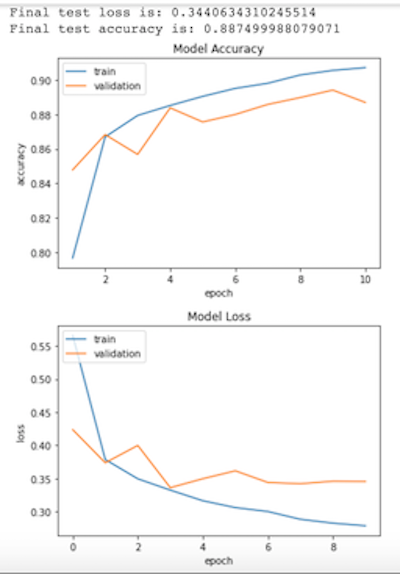

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(num_classes, kernel_regularizer=regularizers.l2(4e-5), activation='softmax')
])

# New batch size to try out
batch_size = 128
epochs = 10

# Here, I instantiate the optimizer with the specified parameters. Then it will
# get passed to 'model.compile()' as the optimizer
opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True, name='SGD')

# We will now train the model at batch size 128. History will give us the history
# of the 'loss', 'accuracy', 'val_loss', and 'val_accuracy' during training
model.compile(loss=categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)

# Report final test accuracy/loss
print('Final test loss is: {}'.format(score[0]))
print('Final test accuracy is: {}'.format(score[1]))

epoch_range = range(1, len(history.history['accuracy']) + 1)

# Summarize the intermediate training/validation accuracy plots over epochs
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

epoch_range = range(1, len(history.history['loss']) + 1)

# Summarize the intermediate training/validation loss plots over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Second graph** \
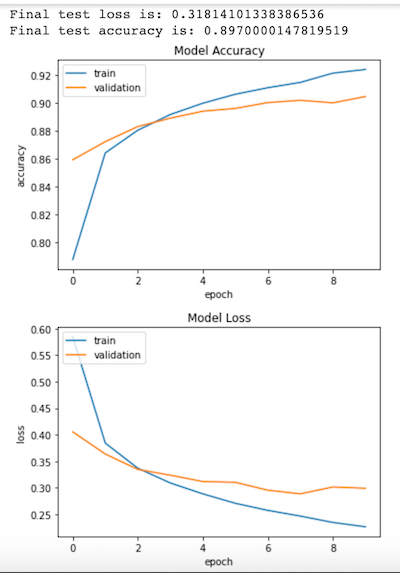

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(num_classes, kernel_regularizer=regularizers.l2(4e-5), activation='softmax')
])

# Change batch_size back to 64
batch_size = 64
epochs = 10

# Compile the model again, this time with 'adam' as the optimizer
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# History will give us the history of the 'loss', 'accuarcy', 'val_loss', and
# 'val_accuracy'
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)

# Report the final test accuracy/loss
print('Final test loss is: {}'.format(score[0]))
print('Final test accuracy is: {}'.format(score[1]))

# Summarize the intermediate training/validation accuracy plots over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize the intermediate training/validation loss plots over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Third graph** \
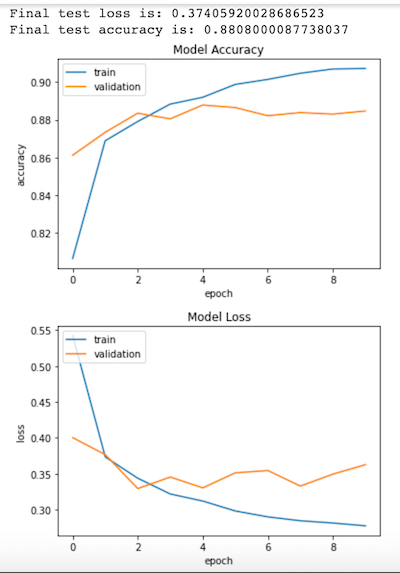

In [ ]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation='relu'),
    layers.Dense(num_classes, kernel_regularizer=regularizers.l2(4e-5), activation='softmax')
])

# Batch size and epochs to train our model
batch_size = 64
epochs = 10

# Here, I instantiate the optimizer with the specified parameters. Then it will
# get passed to 'model.compile()' as the optimizer
opt = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=True, name='SGD')

# Compile the model again, this time with 'adam' as the optimizer
model.compile(loss=categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

# History will give us the history of the 'loss', 'accuarcy', 'val_loss', and
# 'val_accuracy'
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)

# Report the final test accuracy/loss
print('Final test loss is: {}'.format(score[0]))
print('Final test accuracy is: {}'.format(score[1]))

# Summarize the intermediate training/validation accuracy plots over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Summarize the intermediate training/validation loss plots over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()